In [2]:
# Module 4: Data Collection - Case Study Notebook

import pandas as pd
import requests
from bs4 import BeautifulSoup
import sqlite3
import json
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
# 1. Introduction to Data Collection

print("\n1. Introduction to Data Collection")
print("In this notebook, we'll explore various data collection methods:")
print("- File-based sources (CSV, JSON)")
print("- Databases (SQLite)")
print("- APIs and Web Scraping")
print("- Data Manipulation with Pandas")


1. Introduction to Data Collection
In this notebook, we'll explore various data collection methods:
- File-based sources (CSV, JSON)
- Databases (SQLite)
- APIs and Web Scraping
- Data Manipulation with Pandas


In [ ]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/module4/course/module4_course_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module4/course/module4_course_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module4_course_train.csv')
download_file(test_data_url, 'module4_course_test.csv')

In [4]:
# 2. File-based Data Sources

print("\n2. File-based Data Sources")

# CSV: Using Iris dataset from sklearn
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Save to CSV
iris_df.to_csv('iris_data.csv', index=False)

# Read from CSV
csv_data = pd.read_csv('iris_data.csv')
print("CSV data (first 5 rows):")
print(csv_data.head())

# JSON: Convert iris data to JSON format
iris_json = iris_df.to_json(orient='records')

# Save to JSON file
with open('iris_data.json', 'w') as f:
    json.dump(json.loads(iris_json), f)

# Read from JSON
with open('iris_data.json', 'r') as f:
    json_data = json.load(f)
print("\nJSON data (first 2 records):")
print(json.dumps(json_data[:2], indent=2))



2. File-based Data Sources
CSV data (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

JSON data (first 2 records):
[
  {
    "sepal length (cm)": 5.1,
    "sepal width (cm)": 3.5,
    "petal length (cm)": 1.4,
    "petal width (cm)": 0.2,
    "species": "setosa"
  },
  {
    "sepal length (cm)": 4.9,
    "sepal width (cm)": 3.0,
    "petal length (cm)": 1.4,
    "petal width (cm)": 0.2,
    "species": "setosa"
  }
]


In [5]:

# 3. Database Systems

print("\n3. Database Systems")

# SQLite
conn = sqlite3.connect('iris_database.db')
iris_df.to_sql('iris', conn, if_exists='replace', index=False)

# Query the database
query = "SELECT * FROM iris LIMIT 5"
sql_data = pd.read_sql_query(query, conn)
print("SQL data (first 5 rows):")
print(sql_data)

conn.close()



3. Database Systems
SQL data (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [6]:
# 4. APIs and Web Scraping

print("\n4. APIs and Web Scraping")

# RESTful API: Using JSONPlaceholder (a free online REST API)
api_url = "https://jsonplaceholder.typicode.com/posts/1"
response = requests.get(api_url)
api_data = response.json()
print("API data:")
print(json.dumps(api_data, indent=2))


4. APIs and Web Scraping
API data:
{
  "userId": 1,
  "id": 1,
  "title": "sunt aut facere repellat provident occaecati excepturi optio reprehenderit",
  "body": "quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto"
}


In [7]:

# Web Scraping: Scraping a quote from Quotes to Scrape
url = "http://quotes.toscrape.com"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
quote = soup.find('span', class_='text').get_text()
author = soup.find('small', class_='author').get_text()
print("\nWeb Scraping data:")
print(f"Quote: {quote}")
print(f"Author: {author}")


Web Scraping data:
Quote: “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Author: Albert Einstein



5. Data Manipulation with Pandas

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000 

<Figure size 1000x600 with 0 Axes>

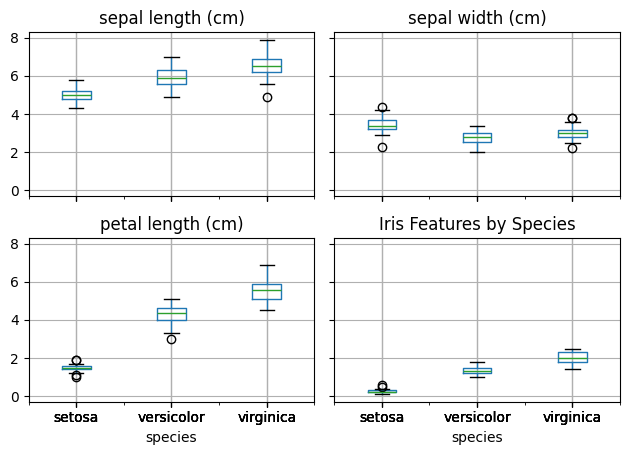

In [8]:

# 5. Data Manipulation with Pandas

print("\n5. Data Manipulation with Pandas")

# Load the Iris dataset
df = pd.read_csv('iris_data.csv')
# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Group by species and calculate mean
species_mean = df.groupby('species').mean()
print("\nMean values for each species:")
print(species_mean)

# Create a new feature
df['sepal_area'] = df['sepal length (cm)'] * df['sepal width (cm)']

# Visualize the data
plt.figure(figsize=(10, 6))
df.boxplot(column=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], by='species')
plt.title('Iris Features by Species')
plt.suptitle('')
plt.tight_layout()
plt.show()